# Preliminary (libraries, cache, functions, color palettes)

In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import fastf1
from fastf1.core import Laps
import os
import seaborn as sns
import numpy as np

In [2]:
#Generating cache folder
cache_folder = 'cache_folder'
if not os.path.exists(cache_folder):
    os.makedirs(cache_folder)

fastf1.Cache.enable_cache(cache_folder)

In [3]:
team_colors = {
    "Alpine": "#F282B4",       # Pink
    "Aston Martin": "#037A68", # Green
    "Ferrari": "#821729",      # Burgundy
    "Haas F1 Team": "#EB0A1E",         # Red
    "Kick Sauber": "#53FC18",  # Bright Green
    "McLaren": "#FF8700",      # Papaya Orange
    "Mercedes": "#C8CCCE",     # Silver/Gray
    "Racing Bulls": "#FFFFFF", # White
    "Red Bull Racing": "#003773",     # Navy Blue
    "Williams": "#00A0DE",     # Blue
}
driver_colors = {
    # Red Bull Racing
    "VER": "#002D5A",  # Max Verstappen (Deep Navy Blue)
    "LAW": "#003F7D",  # Liam Lawson (Brighter Blue)

    # Ferrari
    "LEC": "#9B1B30",  # Charles Leclerc (Darker Burgundy)
    "HAM": "#C81D37",  # Lewis Hamilton (Brighter Red)

    # Mercedes
    "RUS": "#ACB2B5",  # George Russell (Dark Silver)
    "ANT": "#D0D3D4",  # Andrea Kimi Antonelli (Lighter Silver)

    # McLaren
    "NOR": "#FF9800",  # Lando Norris (Papaya Orange)
    "PIA": "#FFB766",  # Oscar Piastri (Lighter Papaya)

    # Aston Martin
    "ALO": "#028061",  # Fernando Alonso (Dark Green)
    "STR": "#03A678",  # Lance Stroll (Lighter Green)

    # Alpine
    "GAS": "#FF66A1",  # Pierre Gasly (Light Pink)
    "DOO": "#D94A90",  # Jack Doohan (Darker Pink)

    # Williams
    "ALB": "#0096C9",  # Alexander Albon (Deep Blue)
    "SAI": "#00B6F1",  # Carlos Sainz (Sky Blue)

    # Racing Bulls
    "HAD": "#E5E5E5",  # Isack Hadjar (Light Gray)
    "TSU": "#FFFFFF",  # Yuki Tsunoda (White)

    # Kick Sauber
    "HUL": "#4EF535",  # Nico Hülkenberg (Bright Green)
    "BOR": "#26D401",  # Gabriel Bortoleto (Darker Green)

    # Haas
    "OCO": "#D91A26",  # Esteban Ocon (Dark Red)
    "BEA": "#F52439",  # Oliver Bearman (Brighter Red)
}

In [4]:
fp2 = fastf1.get_session(2025,'Australia','FP2')
fp2.load()
print('fp2 data loaded')

core           INFO 	Loading data for Australian Grand Prix - Practice 2 [v3.5.3]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info
req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for track_status_data
req            INFO 	Using cached data for _extended_timing_data
req            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
core        WARNING 	No lap data for driver 87
core        WARNING 	Failed to perform lap accuracy check - all laps marked as inaccurate (driver 87)
req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['1', '4', '5', '6', '7', '10', '12', '14', '16', '18', '22', '23', '27', 

fp2 data loaded


In [5]:
df_fp2 = fp2.laps
df_fp2['LapTimeInSeconds'] = df_fp2['LapTime'].dt.total_seconds()
df_fp2.shape

(552, 32)

In [38]:
df_fp2 = df_fp2[df_fp2['LapTime'].isna()==False]

In [39]:
lec_fp2 = df_fp2.pick_drivers('LEC')
lec_fp2

,Time,Driver,DriverNumber,LapTime,LapNumber,Stint,PitOutTime,PitInTime,Sector1Time,Sector2Time,...,Team,LapStartTime,LapStartDate,TrackStatus,Position,Deleted,DeletedReason,FastF1Generated,IsAccurate,LapTimeInSeconds
229,0 days 00:18:38.244000,LEC,16,0 days 00:02:09.991000,1.0,1.0,0 days 00:16:31.313000,NaT,0 days 00:01:00.932000,0 days 00:00:19.948000,...,Ferrari,0 days 00:16:31.313000,2025-03-14 05:01:31.763,1,NaN,False,,False,False,129.991
230,0 days 00:19:56.678000,LEC,16,0 days 00:01:18.434000,2.0,1.0,NaT,NaT,0 days 00:00:27.241000,0 days 00:00:17.850000,...,Ferrari,0 days 00:18:38.244000,2025-03-14 05:03:38.694,1,NaN,False,,False,True,78.434
231,0 days 00:22:21.406000,LEC,16,0 days 00:02:24.728000,3.0,1.0,NaT,NaT,0 days 00:00:46.857000,0 days 00:00:36.118000,...,Ferrari,0 days 00:19:56.678000,2025-03-14 05:04:57.128,1,NaN,False,,False,True,144.728
232,0 days 00:23:39.098000,LEC,16,0 days 00:01:17.692000,4.0,1.0,NaT,NaT,0 days 00:00:27.029000,0 days 00:00:17.688000,...,Ferrari,0 days 00:22:21.406000,2025-03-14 05:07:21.856,1,NaN,False,,False,True,77.692
233,0 days 00:26:05.804000,LEC,16,0 days 00:02:26.706000,5.0,1.0,NaT,0 days 00:25:42.821000,0 days 00:00:39.082000,0 days 00:00:31.057000,...,Ferrari,0 days 00:23:39.098000,2025-03-14 05:08:39.548,1,NaN,False,,False,False,146.706
234,0 days 00:28:14.024000,LEC,16,0 days 00:02:08.220000,6.0,2.0,0 days 00:26:10.132000,NaT,0 days 00:00:55.447000,0 days 00:00:21.764000,...,Ferrari,0 days 00:26:05.804000,2025-03-14 05:11:06.254,1,NaN,False,,False,False,128.220
235,0 days 00:29:35.013000,LEC,16,0 days 00:01:20.989000,7.0,2.0,NaT,NaT,0 days 00:00:26.874000,0 days 00:00:17.586000,...,Ferrari,0 days 00:28:14.024000,2025-03-14 05:13:14.474,1,NaN,False,,False,True,80.989
236,0 days 00:31:32.359000,LEC,16,0 days 00:01:57.346000,8.0,2.0,NaT,NaT,0 days 00:00:44.251000,0 days 00:00:28.563000,...,Ferrari,0 days 00:29:35.013000,2025-03-14 05:14:35.463,1,NaN,False,,False,True,117.346
237,0 days 00:32:49.153000,LEC,16,0 days 00:01:16.794000,9.0,2.0,NaT,NaT,0 days 00:00:26.648000,0 days 00:00:17.492000,...,Ferrari,0 days 00:31:32.359000,2025-03-14 05:16:32.809,1,NaN,False,,False,True,76.794
239,0 days 00:42:37.042000,LEC,16,0 days 00:01:44.430000,11.0,3.0,0 days 00:40:54.527000,NaT,0 days 00:00:45.043000,0 days 00:00:19.399000,...,Ferrari,0 days 00:40:52.612000,2025-03-14 05:25:53.062,1,NaN,False,,False,False,104.430


In [47]:
median_lap_time = lec_fp2['LapTimeInSeconds'].median()
median_lap_time

82.555

In [51]:
lec_fp2["Out/In Lap"] = lec_fp2["LapTimeInSeconds"] > lec_fp2.QUICKLAP_THRESHOLD * median_lap_time
lec_fp2.loc[lec_fp2["Out/In Lap"], "LapType"] = "In/Out Lap"

/var/folders/88/94pqx5n57z5crmg3w50s99y00000gn/T/ipykernel_13963/803137329.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lec_fp2["Out/In Lap"] = lec_fp2["LapTimeInSeconds"] > lec_fp2.QUICKLAP_THRESHOLD * median_lap_time
/var/folders/88/94pqx5n57z5crmg3w50s99y00000gn/T/ipykernel_13963/803137329.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lec_fp2.loc[lec_fp2["Out/In Lap"], "LapType"] = "In/Out Lap"


In [52]:
lec_fp2.head()

,Time,Driver,DriverNumber,LapTime,LapNumber,Stint,PitOutTime,PitInTime,Sector1Time,Sector2Time,...,LapStartDate,TrackStatus,Position,Deleted,DeletedReason,FastF1Generated,IsAccurate,LapTimeInSeconds,Out/In Lap,LapType
229,0 days 00:18:38.244000,LEC,16,0 days 00:02:09.991000,1.0,1.0,0 days 00:16:31.313000,NaT,0 days 00:01:00.932000,0 days 00:00:19.948000,...,2025-03-14 05:01:31.763,1,NaN,False,,False,False,129.991,True,In/Out Lap
230,0 days 00:19:56.678000,LEC,16,0 days 00:01:18.434000,2.0,1.0,NaT,NaT,0 days 00:00:27.241000,0 days 00:00:17.850000,...,2025-03-14 05:03:38.694,1,NaN,False,,False,True,78.434,False,NaN
231,0 days 00:22:21.406000,LEC,16,0 days 00:02:24.728000,3.0,1.0,NaT,NaT,0 days 00:00:46.857000,0 days 00:00:36.118000,...,2025-03-14 05:04:57.128,1,NaN,False,,False,True,144.728,True,In/Out Lap
232,0 days 00:23:39.098000,LEC,16,0 days 00:01:17.692000,4.0,1.0,NaT,NaT,0 days 00:00:27.029000,0 days 00:00:17.688000,...,2025-03-14 05:07:21.856,1,NaN,False,,False,True,77.692,False,NaN
233,0 days 00:26:05.804000,LEC,16,0 days 00:02:26.706000,5.0,1.0,NaT,0 days 00:25:42.821000,0 days 00:00:39.082000,0 days 00:00:31.057000,...,2025-03-14 05:08:39.548,1,NaN,False,,False,False,146.706,True,In/Out Lap


<Axes: xlabel='Stint', ylabel='LapTimeInSeconds'>

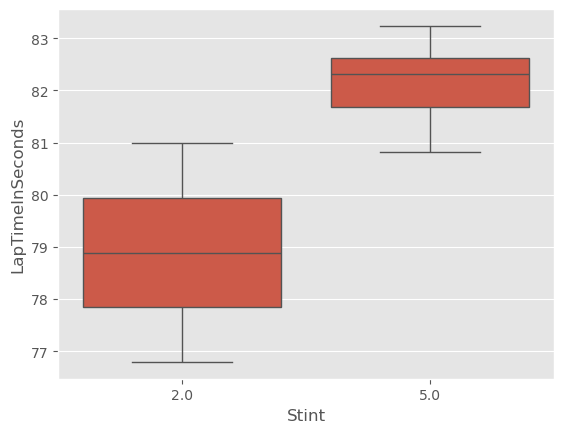

In [55]:
sns.boxplot(lec_fp2[(lec_fp2['LapType']!="In/Out Lap")&((lec_fp2['Stint']==2)|(lec_fp2['Stint']==5))],x='Stint',y='LapTimeInSeconds')